In [254]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

# Data Cleaning

In [333]:
# Use the Pathlib libary to set the path to the CSV
csv_pathwh = Path('whale_returns.csv')
csv_pathal = Path('algo_returns.csv')
csv_pathsp = Path('sp500_history.csv')
csv_pathcost = Path('cost_historical.csv')
csv_pathaapl =Path('aapl_historical.csv') 
csv_pathgoog = Path('goog_historical.csv')

# Whale Returns

In [334]:
# Reading whale returns
whale_df = pd.read_csv(csv_pathwh, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_df.sort_index(inplace=True)
whale_df.head(20)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739
2015-03-11,0.004012,0.005163,0.003312,-0.001147
2015-03-12,0.008265,0.010272,0.013117,0.010801


In [335]:
# To Count the number of records for each portfolio in the Whales returns
whale_df.count()

SOROS FUND MANAGEMENT LLC      1059
PAULSON & CO.INC.              1059
TIGER GLOBAL MANAGEMENT LLC    1059
BERKSHIRE HATHAWAY INC         1059
dtype: int64

In [336]:
# To Set the `columns` attribute to a new list of column names
columns = ["SOROS FUND MGT LLC", "PAULSON & CO.INC", "TIGER GLOBAL MGT LLC", "BERKSHIRE HATHAWAY INC"]
whale_df.columns = columns
whale_df.head()

,SOROS FUND MGT LLC,PAULSON & CO.INC,TIGER GLOBAL MGT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [337]:
# Using the `isnull` function in conjunction with the `sum` function to count the number of null values for each column
whale_df.isnull().sum()

SOROS FUND MGT LLC        1
PAULSON & CO.INC          1
TIGER GLOBAL MGT LLC      1
BERKSHIRE HATHAWAY INC    1
dtype: int64

In [338]:
# Determining percentage of nulls
round((whale_df.isnull().sum() / len(whale_df) * 100),2)

SOROS FUND MGT LLC        0.09
PAULSON & CO.INC          0.09
TIGER GLOBAL MGT LLC      0.09
BERKSHIRE HATHAWAY INC    0.09
dtype: float64

In [339]:
# Use the `duplicated` function to determine the existance of duplicate rows: True or False
whale_df.duplicated()

Date
2015-03-02    False
2015-03-03    False
2015-03-04    False
2015-03-05    False
2015-03-06    False
              ...  
2019-04-25    False
2019-04-26    False
2019-04-29    False
2019-04-30    False
2019-05-01    False
Length: 1060, dtype: bool

In [340]:
# To drop the null values
whale_df.dropna(inplace=True)
whale_df

,SOROS FUND MGT LLC,PAULSON & CO.INC,TIGER GLOBAL MGT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


# Algorithmic Daily Returns

In [263]:
# Reading Algorithmix returns
algo_df = pd.read_csv(csv_pathal, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_df.sort_index(inplace=True)
algo_df.head(100)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2014-10-10,-0.012612,-0.011752
2014-10-13,-0.018528,-0.002009
2014-10-14,0.000702,0.004501


In [264]:
# To count the number of records in the portfolio
algo_df.count()

Algo 1    1241
Algo 2    1235
dtype: int64

In [265]:
# Using the `isnull` function in conjunction with the `sum` function to count the number of null values for each column
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [266]:
# Determining percentage of nulls
round((algo_df.isnull().sum() / len(algo_df) * 100),2)

Algo 1    0.00
Algo 2    0.48
dtype: float64

In [267]:
# To drop null values
algo_df.dropna(inplace=True)
algo_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [268]:
# To validate that there is no more null values in our records
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [269]:
# Renaming the headers
columns = ["ALGO1","ALGO2"]
algo_df.columns = columns
algo_df.head()

,ALGO1,ALGO2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


# S&P 500 Returns

In [270]:
# Reading S&P 500 Closing Prices
sp_df = pd.read_csv(csv_pathsp, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp_df.sort_index(inplace=True)
sp_df.head(100)

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93
...,...
2013-02-20,$1511.95
2013-02-21,$1502.42
2013-02-22,$1515.60


In [271]:
# Clean identified numeric fields with $ symbol
sp_df["Close"] = sp_df["Close"].str.replace("$", "")
sp_df["Close"]
sp_df.head(100)

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2013-02-20,1511.95
2013-02-21,1502.42
2013-02-22,1515.60


In [272]:
# Check data type
sp_df.dtypes

Close    object
dtype: object

In [273]:
# Fix Data Types
sp_df = sp_df.astype("float")
sp_df

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [274]:
# Check Data type again
sp_df.dtypes

Close    float64
dtype: object

In [275]:
 # Calculate Daily Returns
sp_daily_returns = sp_df.pct_change().dropna()
sp_daily_returns.head(100)

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2013-02-21,-0.006303
2013-02-22,0.008773
2013-02-25,-0.018310


In [276]:
# Count the number of records 
sp_df.count()

Close    1649
dtype: int64

In [277]:
# Use the `isnull` function in conjunction with the `sum` function to count the number of null values for 
#each column
sp_df.isnull().sum()

Close    0
dtype: int64

In [278]:
sp_df.dropna(inplace=True)
sp_df

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [279]:
# Set the `columns` attribute to a new list of column names
columns = ["SP_RETURNS"]
sp_daily_returns.columns = columns
sp_daily_returns.head()

,SP_RETURNS
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


 # Combine Whale, Algorithmic, and S&P 500 Returns

In [280]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for 
#each portfolio's returns.
# Concat returns DataFrames
all_returns = pd.concat([whale_df,algo_df,sp_daily_returns], axis='columns', join='inner')
all_returns.sort_index(inplace=True)
all_returns.head()

,SOROS FUND MGT LLC,PAULSON & CO.INC,TIGER GLOBAL MGT LLC,BERKSHIRE HATHAWAY INC,ALGO1,ALGO2,SP_RETURNS
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


#  Conduct Quantitative Analysis

## Performance Anlysis

### Calculate and Plot the daily returns.

In [281]:
 # Display the records 
all_returns.sort_index(inplace=True)
all_returns.head()

,SOROS FUND MGT LLC,PAULSON & CO.INC,TIGER GLOBAL MGT LLC,BERKSHIRE HATHAWAY INC,ALGO1,ALGO2,SP_RETURNS
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


<AxesSubplot:title={'center':'DAILY RETURNS OF ALL PORTFOLIOS'}, xlabel='Date'>

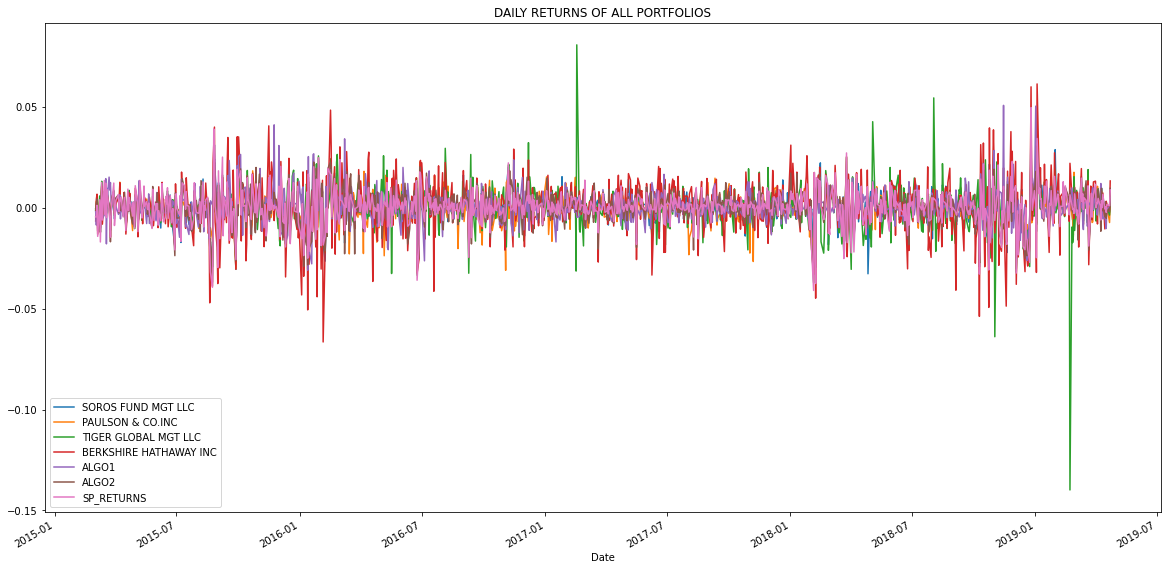

In [282]:
# Plot the daily returns of the combined portfolios
all_returns.plot(figsize=(20,10) , title='DAILY RETURNS OF ALL PORTFOLIOS')


###  Calculate and Plot cumulative returns.

In [283]:
 # Calculate cumulative returns of all portfolios
 # Calculating the cumulative returns using the 'cumprod()' function
cumulative_returns = (1 + all_returns).cumprod() -1

# Sorting datetime index in ascending order (past to present)
cumulative_returns.sort_index(inplace=True)

cumulative_returns.head()

,SOROS FUND MGT LLC,PAULSON & CO.INC,TIGER GLOBAL MGT LLC,BERKSHIRE HATHAWAY INC,ALGO1,ALGO2,SP_RETURNS
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.000962,-0.001755,-0.003028,-0.002383,-0.010514,0.001464,-0.008907
2015-03-05,0.004981,0.002314,-0.000681,0.004327,-0.011459,0.005794,-0.007722
2015-03-06,-0.002963,-0.001269,-0.009156,-0.008828,-0.016359,-0.005733,-0.021786
2015-03-09,-0.002383,0.002951,-0.003367,-0.010466,-0.021717,-0.004437,-0.017928


<AxesSubplot:title={'center':'CULMULATIVE RETURNS PLOT'}, xlabel='Date'>

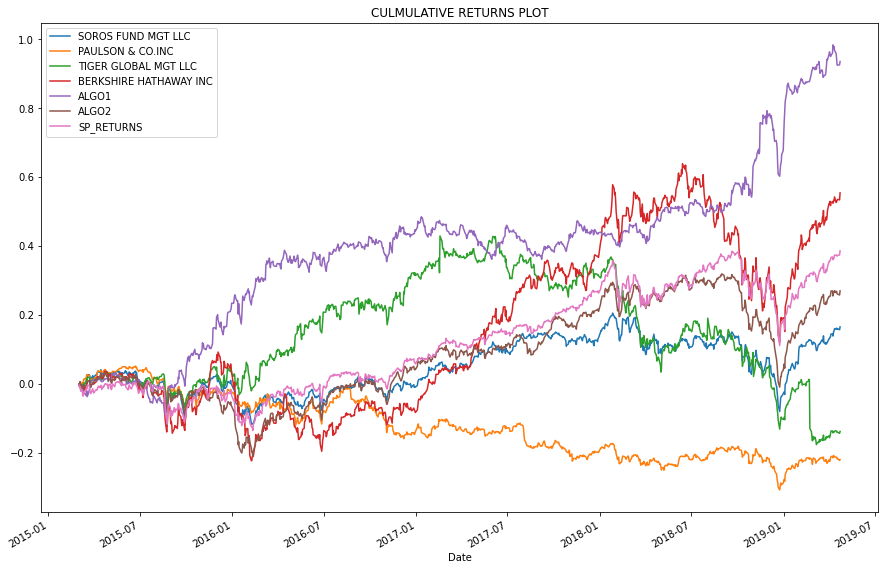

In [284]:
# Plot the culmulative returns for all portfolios 
cumulative_returns.plot(figsize=(15,10), title='CULMULATIVE RETURNS PLOT')

# Risk Analysis

###  Create a box plot for each portfolio

<AxesSubplot:title={'center':'BOX PLOT FOR EACH PORTFOLIO'}>

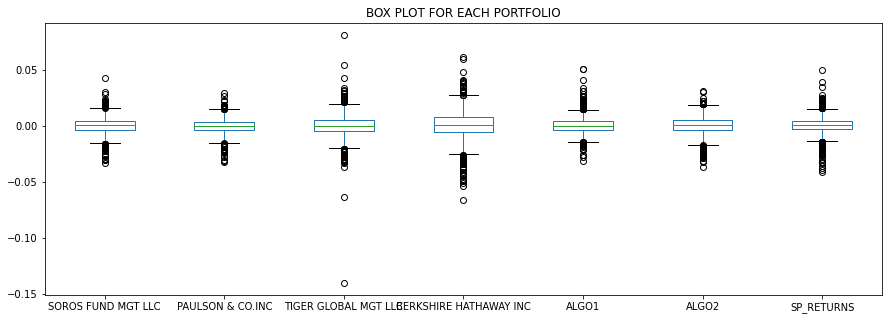

In [285]:
# Box plot to visually show risk
# cumulative_returns.plot.box(figsize=(15, 10), title='BOX PLOT FOR EACH PORTFOLIO')
all_returns.plot.box(figsize=(15, 5), title='BOX PLOT FOR EACH PORTFOLIO')

###  Calculate Standard Deviations

In [286]:
# Calculate the daily standard deviations of all portfolios
daily_std = all_returns.std().fillna("0")
###daily_std = combined_daily_returns.std()
###daily_std = daily_std.sort_values(ascending=False)
daily_std.head()

SOROS FUND MGT LLC        0.007895
PAULSON & CO.INC          0.007023
TIGER GLOBAL MGT LLC      0.010894
BERKSHIRE HATHAWAY INC    0.012919
ALGO1                     0.007620
dtype: float64

#  Determine which portfolios are riskier than the S&P 500

In [287]:
# Calculate  the daily standard deviation of S&P 500
sp_daily_returns_std = sp_daily_returns.std().fillna("0")
sp_daily_returns_std.head()

SP_RETURNS    0.008111
dtype: float64

In [288]:
# Identify the stock with the most risk - STD for daily returns
#daily_std = daily_std.astype("float")
daily_std = daily_std.sort_values(ascending=False)
daily_std.head(100)

BERKSHIRE HATHAWAY INC    0.012919
TIGER GLOBAL MGT LLC      0.010894
SP_RETURNS                0.008554
ALGO2                     0.008342
SOROS FUND MGT LLC        0.007895
ALGO1                     0.007620
PAULSON & CO.INC          0.007023
dtype: float64

### In my opinion, Berkshire and Tiger are more riskier than the S&P 500 because they have higner standard devistion more than S&P 500

In [358]:
# Identify the stock with the most risk
annualized_std = all_returns.std() * np.sqrt(252)
annualized_std.sort_values(inplace=True)
annualized_std 
annualized_std = annualized_std.sort_values(ascending=False)
annualized_std.tail(100)

BERKSHIRE HATHAWAY INC    0.205077
TIGER GLOBAL MGT LLC      0.172936
SP_RETURNS                0.135786
ALGO2                     0.132430
SOROS FUND MGT LLC        0.125335
ALGO1                     0.120967
PAULSON & CO.INC          0.111488
dtype: float64

 # Rolling Statistics

## Calculate and plot rolling std for all portfolios with 21-day window

In [290]:
 ##### Calculate the rolling standard deviation for all portfolios using a 21-day window
all_returns.rolling(window=21).std()

,SOROS FUND MGT LLC,PAULSON & CO.INC,TIGER GLOBAL MGT LLC,BERKSHIRE HATHAWAY INC,ALGO1,ALGO2,SP_RETURNS
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-04-16,0.006711,0.006224,0.007532,0.009731,0.005760,0.007053,0.006498
2019-04-17,0.006773,0.006370,0.007574,0.009485,0.006229,0.007165,0.006537
2019-04-18,0.006633,0.006303,0.007328,0.009475,0.005834,0.007172,0.006470


<AxesSubplot:title={'center':'rolling standard deviation'}, xlabel='Date'>

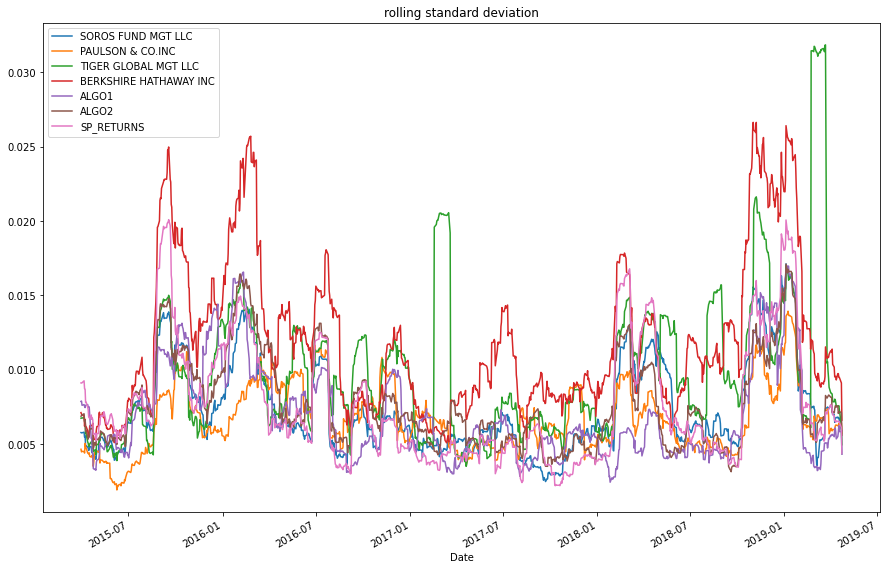

In [291]:
# Plot the rolling standard deviation
all_returns.rolling(window=21).std().plot(figsize=(15, 10), title='rolling standard deviation')

#  Calculate and plot the correlation

In [292]:
 # Calculate the correlation
    # Calculate the correlation between each column
correlation = all_returns.corr()
correlation

,SOROS FUND MGT LLC,PAULSON & CO.INC,TIGER GLOBAL MGT LLC,BERKSHIRE HATHAWAY INC,ALGO1,ALGO2,SP_RETURNS
SOROS FUND MGT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MGT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
ALGO1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
ALGO2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
SP_RETURNS,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


<AxesSubplot:>

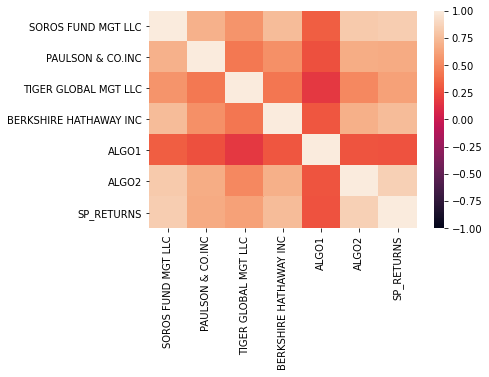

In [293]:
# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)

#  Calculate and Plot Beta for a chosen portfolio (ALGO2) and the S&P 500

In [294]:
 # Calculate Covariance of  ALGO2 returns vs. S&P 50 returns
covariance = all_returns['ALGO2'].cov(all_returns['SP_RETURNS'])
covariance

6.127932374145016e-05

In [295]:
# Calculate variance of ALGO2
variance = all_returns['ALGO2'].var()
variance

6.959354551789667e-05

In [296]:
# Computing beta
ALGO2_beta = covariance / variance
ALGO2_beta

0.8805317114601035

<AxesSubplot:title={'center':'Rolling 60-Day Covariance of ALGO2 Returns vs. S&P 500 Returns'}, xlabel='Date'>

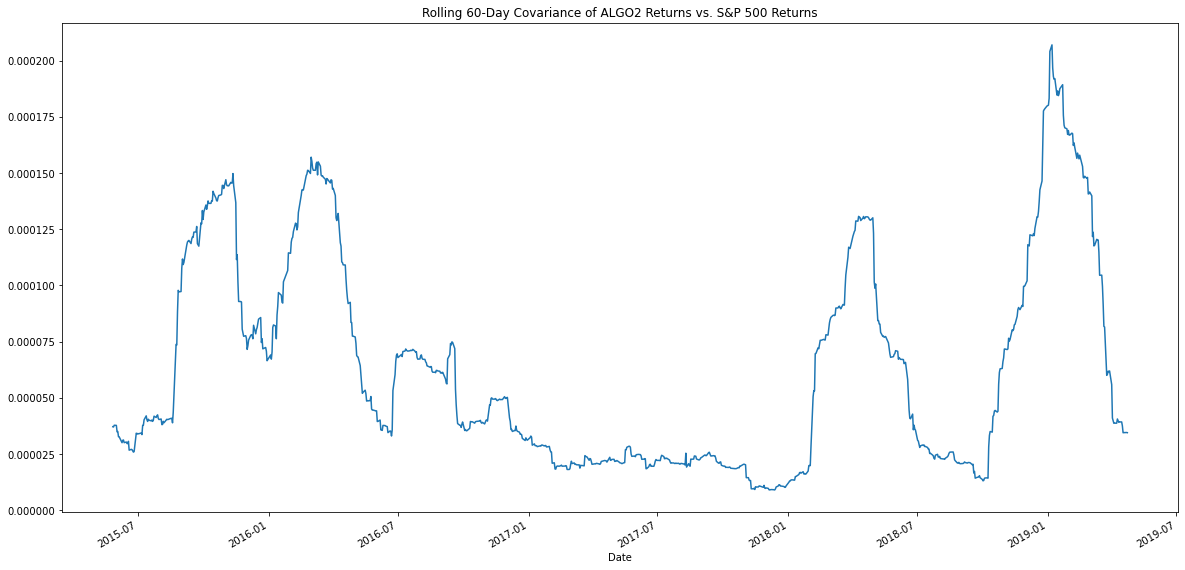

In [297]:
# Calculate 60-Day Rolling Covariance of ALGO2 vs. S&P 500  Returns¶
rolling_covariance = all_returns['ALGO2'].rolling(window=60).cov(all_returns['SP_RETURNS'])
rolling_covariance.plot(figsize=(20, 10), title='Rolling 60-Day Covariance of ALGO2 Returns vs. S&P 500 Returns')

#  Rolling Statistics Challenge: Exponentially Weighted Average

In [298]:
# Use `ewm` to calculate the rolling window


#  Sharpe Ratios

## Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [299]:

all_returns

,SOROS FUND MGT LLC,PAULSON & CO.INC,TIGER GLOBAL MGT LLC,BERKSHIRE HATHAWAY INC,ALGO1,ALGO2,SP_RETURNS
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


In [300]:
# Calculating the corrections for all  portifolio
correlation1 = all_returns.corr()
correlation1

,SOROS FUND MGT LLC,PAULSON & CO.INC,TIGER GLOBAL MGT LLC,BERKSHIRE HATHAWAY INC,ALGO1,ALGO2,SP_RETURNS
SOROS FUND MGT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MGT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
ALGO1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
ALGO2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
SP_RETURNS,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


In [301]:
# Calculating the sum total correlation for each stock
correlation1.sum(axis=0).sort_values()

ALGO1                     2.614209
TIGER GLOBAL MGT LLC      3.715893
PAULSON & CO.INC          4.296740
BERKSHIRE HATHAWAY INC    4.455893
ALGO2                     4.847528
SOROS FUND MGT LLC        5.001465
SP_RETURNS                5.021171
dtype: float64

In [302]:
# Droping highly correlated stocks and keep only the non-correlated stocks
noncorrelated_daily_returns = all_returns.drop(columns=['SP_RETURNS', 'SOROS FUND MGT LLC'])
noncorrelated_daily_returns.head()

,PAULSON & CO.INC,TIGER GLOBAL MGT LLC,BERKSHIRE HATHAWAY INC,ALGO1,ALGO2
Date,,,,,
2015-03-03,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949
2015-03-04,0.003241,-0.002534,0.004213,-0.008589,0.002416
2015-03-05,0.004076,0.002355,0.006726,-0.000955,0.004323
2015-03-06,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460
2015-03-09,0.004225,0.005843,-0.001652,-0.005447,0.001303


In [303]:
# Using the `mean` and `std` functions to calculate the annualized sharpe ratio
sharpe_ratios = (noncorrelated_daily_returns.mean() * 252) / (noncorrelated_daily_returns.std() * np.sqrt(252))
sharpe_ratios

PAULSON & CO.INC         -0.483570
TIGER GLOBAL MGT LLC     -0.121060
BERKSHIRE HATHAWAY INC    0.621810
ALGO1                     1.378648
ALGO2                     0.501364
dtype: float64

<AxesSubplot:title={'center':'sharpe ratios as a bar plot'}>

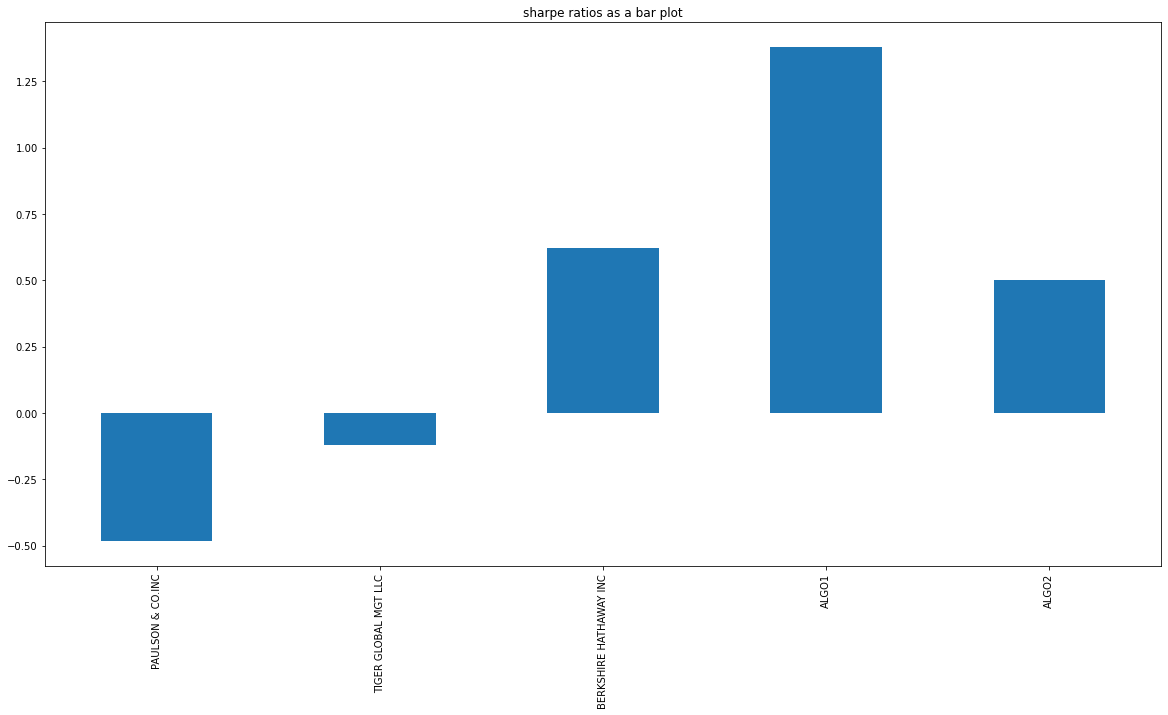

In [304]:
sharpe_ratios.plot(figsize=(20, 10), title='sharpe ratios as a bar plot',kind="bar")

# Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

## ALGO2 performed better than both the S&P 500 and Whales when considering the culmulative returns of all portfolios

# Create Custom Portfolio

In [342]:
# Reading data from 1st stock - Costco
cost_df = pd.read_csv(csv_pathcost, index_col="Date", infer_datetime_format=True, parse_dates=True)
# cost_df = pd.read_csv(csv_pathcost, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
cost_df.sort_index(inplace=True)
cost_df = cost_df.reset_index()
cost_df = cost_df.pivot_table(values="NOCP", index="Date", columns="Symbol")
cost_df.head(20)

Symbol,COST
Date,
2018-05-11,195.76
2018-05-14,195.88
2018-05-15,195.48
2018-05-16,198.71
2018-05-17,199.60
2018-05-18,198.96
2018-05-21,199.62
2018-05-22,198.97
2018-05-23,198.14


In [343]:
# Reading data from 2nd stock - Apple
aapl_df = pd.read_csv(csv_pathaapl, index_col="Date", infer_datetime_format=True, parse_dates=True)
aapl_df.sort_index(inplace=True)
aapl_df = aapl_df.reset_index()
aapl_df = aapl_df.pivot_table(values="NOCP", index="Date", columns="Symbol")
aapl_df.head(20)

Symbol,AAPL
Date,
2018-05-11,188.59
2018-05-14,188.15
2018-05-15,186.44
2018-05-16,188.18
2018-05-17,186.99
2018-05-18,186.31
2018-05-21,187.63
2018-05-22,187.16
2018-05-23,188.36


In [344]:
 # Reading data from 3rd stock - Google
goog_df = pd.read_csv(csv_pathgoog, index_col="Date", infer_datetime_format=True, parse_dates=True)
goog_df.sort_index(inplace=True)
goog_df = goog_df.reset_index()
goog_df = goog_df.pivot_table(values="NOCP", index="Date", columns="Symbol")
goog_df.head(20)

Symbol,GOOG
Date,
2018-05-11,1098.26
2018-05-14,1100.20
2018-05-15,1079.23
2018-05-16,1081.77
2018-05-17,1078.59
2018-05-18,1066.36
2018-05-21,1079.58
2018-05-22,1069.73
2018-05-23,1079.69


In [345]:
 # Combine all stocks in a single DataFrame
all_cust_returns = pd.concat([cost_df,aapl_df,goog_df], axis='columns', join='inner')
all_cust_returns.sort_index(inplace=True)
all_cust_returns.head()
    

Symbol,COST,AAPL,GOOG
Date,,,
2018-05-11,195.76,188.59,1098.26
2018-05-14,195.88,188.15,1100.20
2018-05-15,195.48,186.44,1079.23
2018-05-16,198.71,188.18,1081.77
2018-05-17,199.60,186.99,1078.59


In [346]:
# Reorganize portfolio data by having a column per symbol
columns = ["COSTCO","APPLE","GOOGLE"]
all_cust_returns.columns = columns
all_cust_returns.head(100)

,COSTCO,APPLE,GOOGLE
Date,,,
2018-05-11,195.76,188.59,1098.26
2018-05-14,195.88,188.15,1100.20
2018-05-15,195.48,186.44,1079.23
2018-05-16,198.71,188.18,1081.77
2018-05-17,199.60,186.99,1078.59
...,...,...,...
2018-09-26,233.81,220.42,1180.49
2018-09-27,234.00,224.95,1194.64
2018-09-28,234.88,225.74,1193.47


In [347]:
 # Calculate daily returns
cust_daily_ret = all_cust_returns.pct_change()

# Drop NAs
cust_daily_ret.dropna(inplace=True)

# Display sample data
cust_daily_ret

,COSTCO,APPLE,GOOGLE
Date,,,
2018-05-14,0.000613,-0.002333,0.001766
2018-05-15,-0.002042,-0.009088,-0.019060
2018-05-16,0.016523,0.009333,0.002354
2018-05-17,0.004479,-0.006324,-0.002940
2018-05-18,-0.003206,-0.003637,-0.011339
...,...,...,...
2019-05-03,0.007953,0.012431,0.019602
2019-05-06,-0.001594,-0.015443,0.003366
2019-05-07,-0.016583,-0.026957,-0.012855


#  Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [348]:
# Set weights
weights = [1/3, 1/3, 1/3]
# Calculate portfolio return
cust_portfolio_returns = cust_daily_ret.dot(weights)
# Display sample data
cust_portfolio_returns.head(100)

Date
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
                ...   
2018-09-27    0.011117
2018-09-28    0.002098
2018-10-01    0.002432
2018-10-02    0.006716
2018-10-03    0.000402
Length: 100, dtype: float64

# Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [349]:
 # Join your returns DataFrame to the original returns DataFrame
combined_returns = pd.concat([all_returns,cust_daily_ret], axis='columns', join='inner')
combined_returns.sort_index(inplace=True)
combined_returns.tail()
    

,SOROS FUND MGT LLC,PAULSON & CO.INC,TIGER GLOBAL MGT LLC,BERKSHIRE HATHAWAY INC,ALGO1,ALGO2,SP_RETURNS,COSTCO,APPLE,GOOGLE
Date,,,,,,,,,,
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,-0.004019,0.000100,0.004938
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.000897,0.019473,0.007505
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.001018,0.003594,0.000024
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,-0.009723,0.003287,0.010086
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841,0.008874,0.014423,0.012580


In [350]:
 # Only compare dates where return data exists for all the stocks (drop NaNs)
# To drop null values
combined_returns.dropna(inplace=True)
combined_returns

,SOROS FUND MGT LLC,PAULSON & CO.INC,TIGER GLOBAL MGT LLC,BERKSHIRE HATHAWAY INC,ALGO1,ALGO2,SP_RETURNS,COSTCO,APPLE,GOOGLE
Date,,,,,,,,,,
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000613,-0.002333,0.001766
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.002042,-0.009088,-0.019060
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.016523,0.009333,0.002354
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,0.004479,-0.006324,-0.002940
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.003206,-0.003637,-0.011339
...,...,...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,-0.004019,0.000100,0.004938
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.000897,0.019473,0.007505
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.001018,0.003594,0.000024


#  Re-runing the risk analysis with my portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [354]:
# Calculate the daily standard deviations of all portfolios
combined_daily_std = combined_returns.std().fillna("0")
###daily_std = combined_daily_returns.std()
###daily_std = daily_std.sort_values(ascending=False)
combined_daily_std.head(100)

SOROS FUND MGT LLC        0.009240
PAULSON & CO.INC          0.007353
TIGER GLOBAL MGT LLC      0.014648
BERKSHIRE HATHAWAY INC    0.015569
ALGO1                     0.008423
ALGO2                     0.008791
SP_RETURNS                0.009578
COSTCO                    0.013357
APPLE                     0.018706
GOOGLE                    0.016095
dtype: float64

In [359]:
# Calculate the annualized `std`
C_annualized_std = combined_returns.std() * np.sqrt(252)
C_annualized_std.sort_values(inplace=True)
# annualized_std = annualized_std.sort_values(ascending=False)
C_annualized_std.tail(100)

PAULSON & CO.INC          0.116732
ALGO1                     0.133704
ALGO2                     0.139556
SOROS FUND MGT LLC        0.146675
SP_RETURNS                0.152054
COSTCO                    0.212034
TIGER GLOBAL MGT LLC      0.232531
BERKSHIRE HATHAWAY INC    0.247155
GOOGLE                    0.255500
APPLE                     0.296951
dtype: float64

###  Calculate and plot rolling std with 21-day window

In [361]:
 # Calculate and 
 # Calculating the corrections for all  portifolio
correlation2 = combined_returns.corr()
correlation2
 

,SOROS FUND MGT LLC,PAULSON & CO.INC,TIGER GLOBAL MGT LLC,BERKSHIRE HATHAWAY INC,ALGO1,ALGO2,SP_RETURNS,COSTCO,APPLE,GOOGLE
SOROS FUND MGT LLC,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981,0.518175,0.609126,0.682919
PAULSON & CO.INC,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766680,0.496810,0.544949,0.554123
TIGER GLOBAL MGT LLC,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030,0.353235,0.334864,0.291055
BERKSHIRE HATHAWAY INC,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852303,0.431956,0.694062,0.824391
ALGO1,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.289358,0.139522,0.224385,0.272740
ALGO2,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.875721,0.496460,0.639512,0.682227
SP_RETURNS,0.876981,0.766680,0.481030,0.852303,0.289358,0.875721,1.000000,0.590297,0.759909,0.792070
COSTCO,0.518175,0.496810,0.353235,0.431956,0.139522,0.496460,0.590297,1.000000,0.433918,0.410074
APPLE,0.609126,0.544949,0.334864,0.694062,0.224385,0.639512,0.759909,0.433918,1.000000,0.692497
GOOGLE,0.682919,0.554123,0.291055,0.824391,0.272740,0.682227,0.792070,0.410074,0.692497,1.000000


<AxesSubplot:>

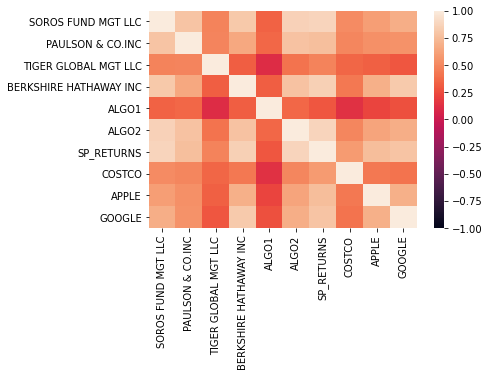

In [366]:
# plot the correlation
# correlation2.plot(figsize=(20, 10), title='Correction Plot of all combined portfolio')
# Display de correlation matrix
sns.heatmap(correlation2, vmin=-1, vmax=1)

#  Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [372]:
 # Calculate Covariance of  ALGO2 returns vs. S&P 50 returns
appl_covariance = combined_returns['APPLE'].cov(all_returns['SP_RETURNS'])
appl_covariance


0.00013615807352982602

In [373]:
# Calculate variance of ALGO2
appl_variance = combined_returns['APPLE'].var()
appl_variance

0.00034992000402000876

In [374]:
# Computing beta
APPLE_beta = appl_covariance / appl_variance
APPLE_beta


0.3891120026451542

<AxesSubplot:title={'center':'Rolling 60-Day Covariance of APPLE Returns vs. S&P 500 Returns'}, xlabel='Date'>

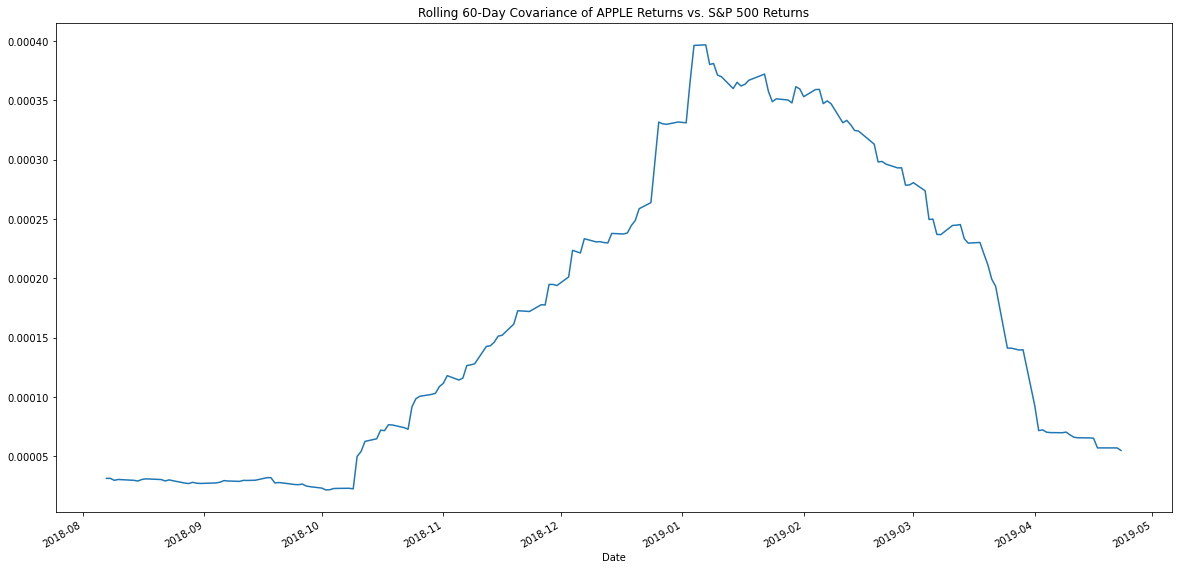

In [375]:
# Calculate 60-Day Rolling Covariance of ALGO2 vs. S&P 500  Returns¶
appl_rolling_covariance = combined_returns['APPLE'].rolling(window=60).cov(combined_returns['SP_RETURNS'])
appl_rolling_covariance.plot(figsize=(20, 10), title='Rolling 60-Day Covariance of APPLE Returns vs. S&P 500 Returns')

#  Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [376]:
 # Calculate Annualzied Sharpe Ratios
# Calculating the corrections for all  portifolio
# Calculating the sum total correlation for each stock
correlation2.sum(axis=0).sort_values()


ALGO1                     3.432197
TIGER GLOBAL MGT LLC      4.273693
COSTCO                    4.870446
APPLE                     5.933224
GOOGLE                    6.202095
PAULSON & CO.INC          6.435616
BERKSHIRE HATHAWAY INC    6.705406
ALGO2                     6.898233
SOROS FUND MGT LLC        6.975138
SP_RETURNS                7.284350
dtype: float64

In [377]:
# Droping highly correlated stocks and keep only the non-correlated stocks
c_noncorrelated_daily_returns = combined_returns.drop(columns=['SP_RETURNS', 'SOROS FUND MGT LLC','ALGO2'])
c_noncorrelated_daily_returns.head()


,PAULSON & CO.INC,TIGER GLOBAL MGT LLC,BERKSHIRE HATHAWAY INC,ALGO1,COSTCO,APPLE,GOOGLE
Date,,,,,,,
2018-05-14,0.000000,0.000000,0.000000,0.000915,0.000613,-0.002333,0.001766
2018-05-15,-0.001409,-0.003189,-0.014606,-0.001135,-0.002042,-0.009088,-0.019060
2018-05-16,0.006244,0.005480,0.004310,-0.002326,0.016523,0.009333,0.002354
2018-05-17,0.002524,-0.006267,-0.005140,-0.006949,0.004479,-0.006324,-0.002940
2018-05-18,-0.002672,-0.012832,-0.002212,0.002557,-0.003206,-0.003637,-0.011339


In [381]:
c_sharpe_ratios = (c_noncorrelated_daily_returns.mean() * 252) / (c_noncorrelated_daily_returns.std() * np.sqrt(252))
c_sharpe_ratios

PAULSON & CO.INC          0.258738
TIGER GLOBAL MGT LLC     -1.034216
BERKSHIRE HATHAWAY INC    0.159756
ALGO1                     2.035665
COSTCO                    1.244419
APPLE                     0.490850
GOOGLE                    0.714034
dtype: float64

<AxesSubplot:title={'center':'sharpe ratios as a bar plot'}>

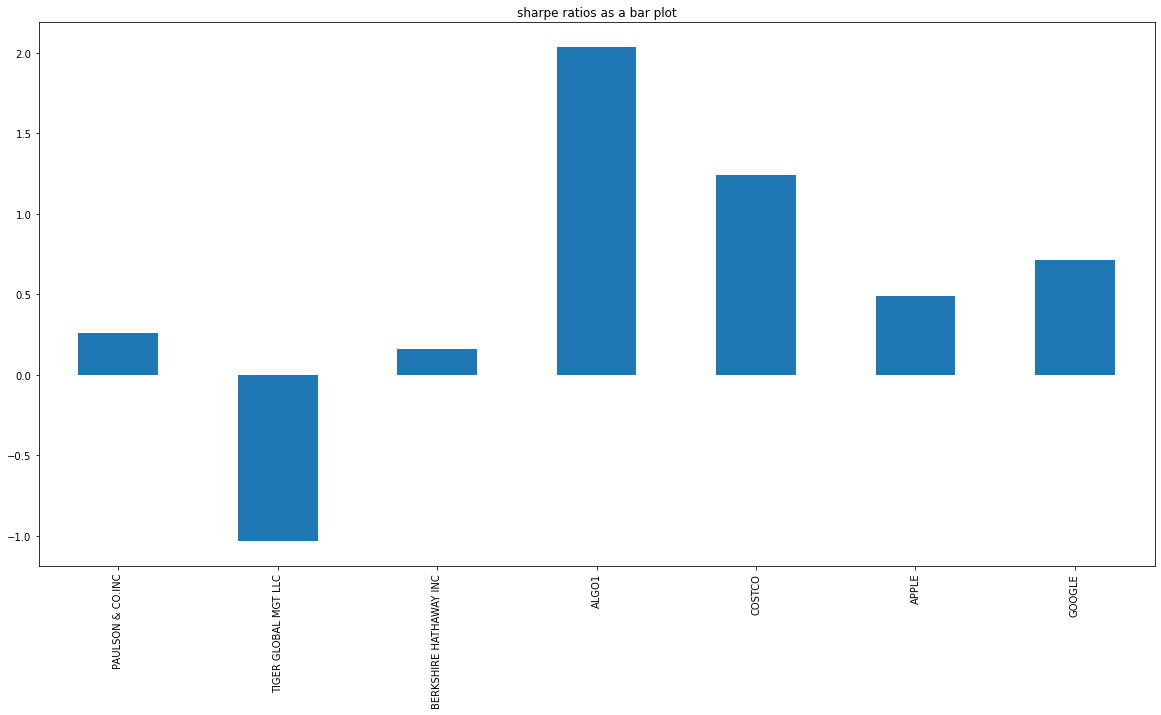

In [384]:
c_sharpe_ratios.plot(figsize=(20, 10), title='sharpe ratios as a bar plot',kind="bar")

In [ ]:
A